In [67]:
import numpy as np

# matrice de similarité
sim_mat = np.array([
    [10, 6, 0, 0, 0, 0, 0, 0, 0],
    [6, 10, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 10, 5, 3, 3, 1, 1, 0],
    [0, 0, 5, 10, 1, 2, 1, 1, 0],
    [0, 0, 3, 1, 10, 4, 1, 2, 0],
    [0, 0, 3, 2, 4, 10, 1, 4, 0],
    [0, 0, 1, 1, 1, 1, 10, 1, 0],
    [0, 0, 1, 1, 2, 4, 1, 10, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 10]
])

labels = ["arabe", "hébreu", "sanskrit", "avestique", "grec classique", "latin", "gotique", "irlandais ancien", "turc"]
I = [True] * len(labels)  # Indicator for active clusters
P = [[] for _ in range(len(labels))]  # Priority queues for each cluster
L = []  # List to store the fusion steps

# Initialize priority queues
def init(sim_matrice, labels):
    for i in range(len(labels)):
        P[i] = sorted(range(len(sim_matrice[i])), key=lambda k: sim_matrice[i][k], reverse=True)[1:]
        print(f"File de priorité pour {labels[i]}: {P[i]}")

init(sim_mat, labels)

for k in range(len(labels)-1):
    max_sim = -1
    i1, i2 = -1, -1
    for i in range(len(labels)):
        if I[i]:
            for j in range(len(labels)):
                if I[j] and sim_mat[i][j] > max_sim and j != i:
                    max_sim = sim_mat[i][j]
                    i1, i2 = i, j

    # Merge clusters i1 and i2
    I[i2] = False
    L.append([i1, i2])
    
    print(f"Fusion de {labels[i1]} et {labels[i2]}")
    
    # Update the sim matrix
    for i in range(len(labels)):
        if I[i] and i != i1:
            sim_mat[i][i1] = sim_mat[i1][i] = max(sim_mat[i][i1], sim_mat[i][i2])  # Single-linkage: max(sim(di, d1), sim(di, d2))

    # Remove i2
    for i in range(len(labels)):
        if I[i] and i != i1:
            if i2 in P[i]:
                P[i].remove(i2)
            if i1 in P[i]:
                P[i].remove(i1)
    
    # Update i1
    P[i1] = sorted([i for i in range(len(labels)) if I[i] and i != i1], key=lambda x: sim_mat[i1][x], reverse=True)

print("Liste des fusions effectuées:", L)


File de priorité pour arabe: [1, 2, 3, 4, 5, 6, 7, 8]
File de priorité pour hébreu: [0, 2, 3, 4, 5, 6, 7, 8]
File de priorité pour sanskrit: [3, 4, 5, 6, 7, 0, 1, 8]
File de priorité pour avestique: [2, 5, 4, 6, 7, 0, 1, 8]
File de priorité pour grec classique: [5, 2, 7, 3, 6, 0, 1, 8]
File de priorité pour latin: [4, 7, 2, 3, 6, 0, 1, 8]
File de priorité pour gotique: [2, 3, 4, 5, 7, 0, 1, 8]
File de priorité pour irlandais ancien: [5, 4, 2, 3, 6, 0, 1, 8]
File de priorité pour turc: [0, 1, 2, 3, 4, 5, 6, 7]
Fusion de arabe et hébreu
Fusion de sanskrit et avestique
Fusion de grec classique et latin
Fusion de grec classique et irlandais ancien
Fusion de sanskrit et grec classique
Fusion de sanskrit et gotique
Fusion de arabe et sanskrit
Fusion de arabe et turc
Liste des fusions effectuées: [[0, 1], [2, 3], [4, 5], [4, 7], [2, 4], [2, 6], [0, 2], [0, 8]]


[[ 0.  1.  1.  2.]
 [ 2.  3.  2.  2.]
 [ 4.  5.  3.  2.]
 [11.  7.  4.  3.]
 [10. 12.  5.  5.]
 [13.  6.  6.  6.]
 [ 9. 14.  7.  8.]
 [15.  8.  8.  9.]]


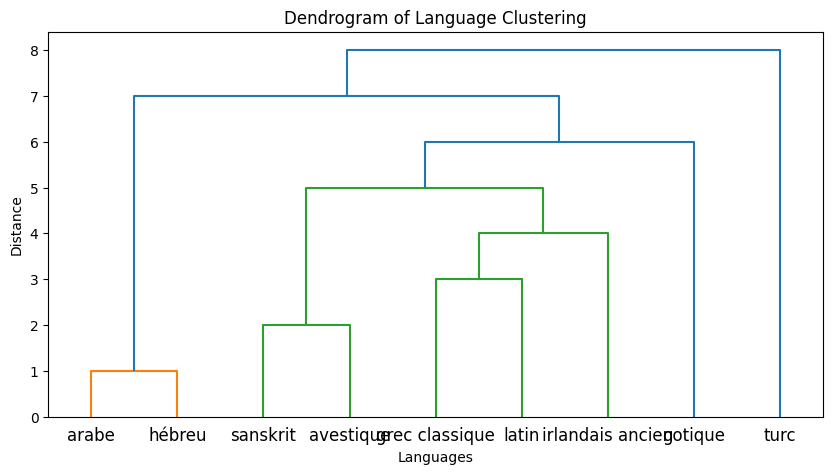

In [68]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import numpy as np

def create_linkage_matrix(L, n):
    Z = np.zeros((n - 1, 4)) #initalize empty linkage matrix
    current_cluster = np.arange(n)
    cluster_sizes = np.ones(n)
    next_cluster_index = n

    #linkage matrix construction
    for k, (i1, i2) in enumerate(L):
        ci1, ci2 = current_cluster[i1], current_cluster[i2] #get the current active cluster of a language 
        Z[k] = [ci1, ci2, k + 1, cluster_sizes[ci1] + cluster_sizes[ci2]] # [idx1, idx2, distance, n_elements]
        current_cluster[i1] = current_cluster[i2] = next_cluster_index #update active clusters
        cluster_sizes = np.append(cluster_sizes, Z[k, 3]) #update the cluster size after merge
        next_cluster_index += 1

    return Z

Z = create_linkage_matrix(L, len(labels))
print(Z)
# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=labels)
plt.title('Dendrogram of Language Clustering')
plt.xlabel('Languages')
plt.ylabel('Distance')
plt.show()